# Time Series Forecasting Using LSTM

1. Univariate LSTM Models
    1. Data Preparation
    2. Vanilla LSTM
    3. Stacked LSTM
    4. Bidirectional LSTM
    5. CNN LSTM
    6. ConvLSTM
   
   
2. Multivariate LSTM Models
    1. Multiple Input Series.
    2. Multiple Parallel Series
    
    
3. Multi-Step LSTM Models
    1. Data Preparation
    2. Vector Output Model
    3. Encoder-Decoder Model
    
    
4. Multivariate Multi-Step LSTM Models
    1. Multiple Input Multi-Step Output.
    2. Multiple Parallel Input and Multi-Step Output.

# Univarite Forecasting on dummy dataset

1. Import all the dependencies
2. Prepare independent and dependent features
3. Reshape the data
4. Build and Compile the model
5. Train the model
6. Plot Training Loss 
7. Predicting For the next 10 data
8. Visualizaing The Output

# Installing the tensorflow version 2.0.0

In [1]:
!pip install tensorflow==2.2.0

In [2]:
!pip install numpy==1.19.5

## 1. Import all the dependencies

In [3]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from datetime import date
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import pandas as pd

import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

## 2. preparing independent and dependent features

In [4]:
def prepare_data(timeseries_data, n_features):
    """
    objective: prepare data for time serires forecasting 
    
    timeseries_data: input array 
    n_features: time_step
    
    return: X, y 
    """
    
    X, y =[],[]
    
    for i in range(len(timeseries_data)):
        
        # find the end of this pattern
        end_ix = i + n_features
        
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [5]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [6]:
print(X) # x independent variable

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [7]:
print(y) # y dependent variable

[146 158 172 187 196 210]


In [8]:
X.shape

(6, 3)

## 3.  Reshape the data

In [9]:



# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [10]:
X.shape

(6, 3, 1)

In [11]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

## 4. Build and Compile the model

In [12]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

## 5. Train the model

In [13]:
EPOCHS = 300

# fit model
H = model.fit(X, y, epochs=EPOCHS, verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 2ms/step - loss: 32011.9277
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 30841.4844
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 29976.5410
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 29301.1816
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 28632.7285
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 27959.3359
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 27307.2129
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 26699.4004
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 26150.1309
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 25636.8438
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 25137.1406
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 24642.2285
Epoch 13/300


## 6. Plot Training Loss 

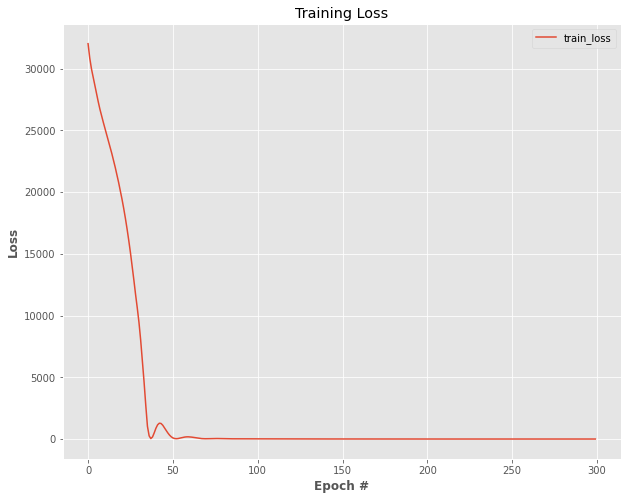

In [14]:
# plot the training  loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

## 7. Predicting For the next 10 data

In [15]:
# demonstrate prediction for next 10 days

x_input = np.array([187, 196, 210], dtype="float32")
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        
        x_input=array(temp_input[1:])
        
        print("--"*25)
        print("{} - day input: {}".format(i,x_input))

        x_input = x_input.reshape((1, n_steps, n_features))

        yhat = model.predict(x_input, verbose=0)
        print("{} - day output: {}".format(i,yhat[0]))
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]

        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    
print()
print("FINAL OUTPUT FOR 10 DAYS..")
print(lst_output)

[222.7598]
--------------------------------------------------
1 - day input: [196.     210.     222.7598]
1 - day output: [234.02248]
--------------------------------------------------
2 - day input: [210.      222.7598  234.02248]
2 - day output: [248.03151]
--------------------------------------------------
3 - day input: [222.7598  234.02248 248.03151]
3 - day output: [261.50024]
--------------------------------------------------
4 - day input: [234.02248 248.03151 261.50024]
4 - day output: [274.95734]
--------------------------------------------------
5 - day input: [248.03151 261.50024 274.95734]
5 - day output: [290.03503]
--------------------------------------------------
6 - day input: [261.50024 274.95734 290.03503]
6 - day output: [305.11404]
--------------------------------------------------
7 - day input: [274.95734 290.03503 305.11404]
7 - day output: [320.75275]
--------------------------------------------------
8 - day input: [290.03503 305.11404 320.75275]
8 - day outp

## 8. Visualizaing The Output

In [16]:
timeseries_data # original input time series data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [17]:
lst_output # our prediction

[222.7598,
 234.02248,
 248.03151,
 261.50024,
 274.95734,
 290.03503,
 305.11404,
 320.75275,
 337.54123,
 354.73196]

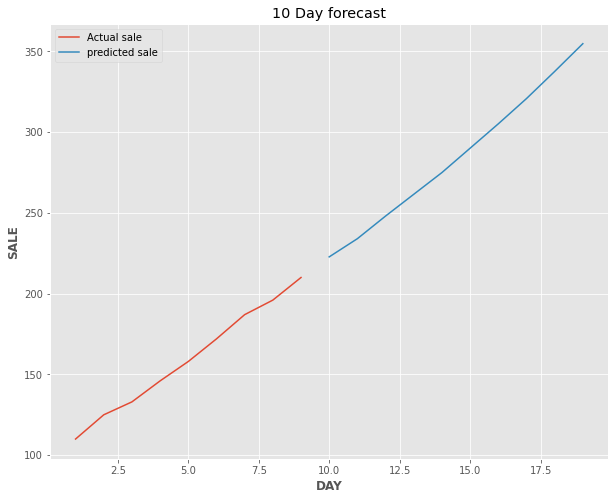

In [18]:
day_new=np.arange(1,10) # create day for time series data
day_pred=np.arange(10,20) # create day for predicted data

# plot both 
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(day_new,timeseries_data, label="Actual sale")
plt.plot(day_pred,lst_output, label="predicted sale")
plt.title("10 Day forecast")
plt.xlabel("DAY", weight="bold")
plt.ylabel("SALE", weight="bold")
plt.legend()
plt.show()

## Apple Stock Prediction and Forecasting Using Stacked LSTM 

1. Import Data and Dependencies
2. Perform Feature Scaling
3. Preprocess the Data in Train and Test splits
4. Prepare independent and dependent features
5. Reshape the data
6. Build and Compile the model
7. Train the model
8. Plot Training and Validation Loss
9. Predicting For the next 30 data
10. Visualizaing The Output

### Mounting to Google Drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# change working DIR 
import os 
os.chdir("/content/drive/MyDrive/DeepL/13. Stock Prediction using LSTM")

In [21]:
df = pd.read_csv('Apple Stocks Prise.csv') 

In [22]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [23]:
df.shape # check the shape of the data

(1258, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


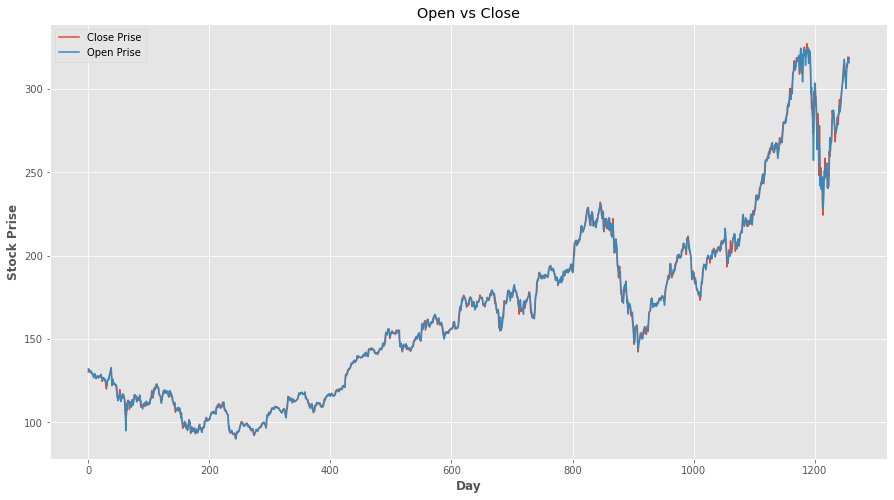

In [25]:
# plot both close prise and open prise for stocks

plt.style.use("ggplot")
plt.figure(figsize = [15,8])
plt.plot(df["close"], label="Close Prise")
plt.plot(df["open"], label="Open Prise")
plt.title("Open vs Close")
plt.xlabel("Day", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

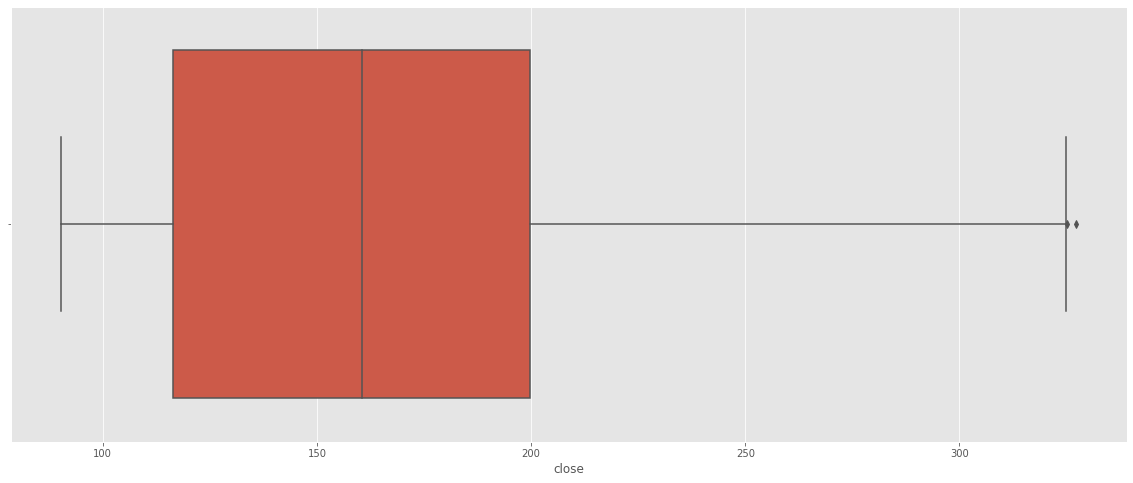

In [26]:
# check the outlier for close prise
plt.figure(figsize=(20,8))
sns.boxplot(df['close'])

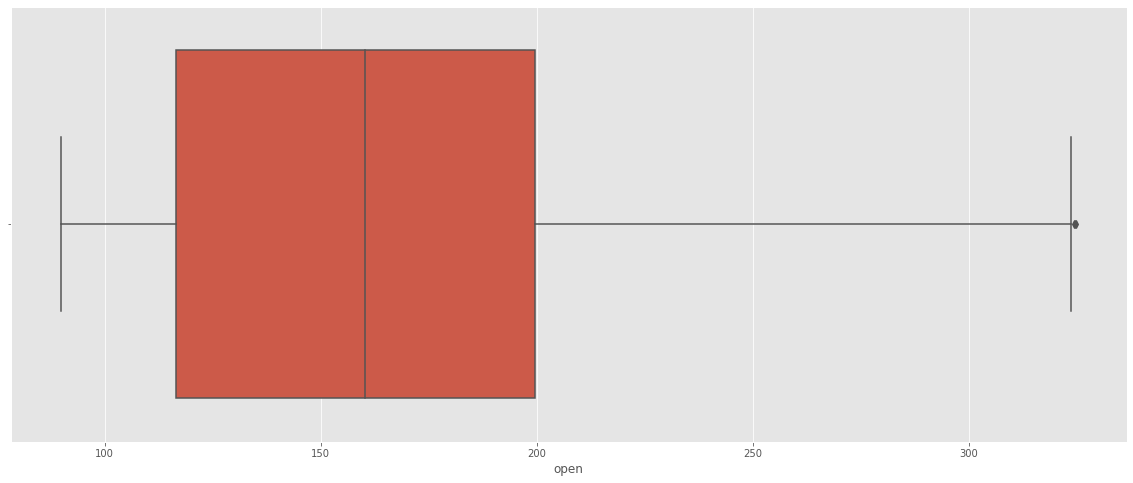

In [27]:
# check the outlier for open prise 
plt.figure(figsize=(20,8))
sns.boxplot(df['open'])

### 3. Perform Feature Scaling

In [28]:
# we will select the close prise variable for time series forecasting 
Close = df["close"]
Close

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [29]:
# transform values in the range of 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
Close_scaled =scaler.fit_transform(np.array(Close).reshape(-1,1))
Close_scaled

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [30]:
len(Close_scaled) # total length is 1258

1258

### 3. Preprocess the Data in Train and Test splits

In [31]:
# select 80% as train size and remaining 20% as test data
training_size=int(len(Close_scaled)*0.80)
test_size=len(Close_scaled)-training_size

train_data = Close_scaled[0:training_size,:]
test_data = Close_scaled[training_size:len(Close_scaled),:1]

In [32]:
print("Training Size: ", training_size)
print("Testing Size: ", test_size)

Training Size:  1006
Testing Size:  252


In [33]:
print("sample from train: ", train_data[:10])
print()
print("sample from test: ", test_data[:10])

sample from train:  [[0.17607447]
 [0.17495567]
 [0.16862282]
 [0.1696994 ]
 [0.16727181]
 [0.16794731]
 [0.16473866]
 [0.16174111]
 [0.1581525 ]
 [0.15654817]]

sample from test:  [[0.37418728]
 [0.37106308]
 [0.36747446]
 [0.37135861]
 [0.35772186]
 [0.35024909]
 [0.37701596]
 [0.38925948]
 [0.40057418]
 [0.42138816]]


### 4. Prepare independent and dependent features

In [34]:

# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [36]:
print(X_train.shape), print(y_train.shape)

(905, 100)
(905,)


(None, None)

In [37]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

### 5. Reshape the data

In [38]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
X_train.shape, X_test.shape

((905, 100, 1), (151, 100, 1))

### 6. Build and Compile the model

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### 7. Train the model

In [42]:
EPOCHS = 300
H = model.fit(X_train,
          y_train,
          validation_data=(X_test,ytest),
          epochs=EPOCHS,
          batch_size=64,
          verbose=1)

Epoch 1/300
15/15 [==============================] - 4s 237ms/step - loss: 0.0201 - val_loss: 0.0961
Epoch 2/300
15/15 [==============================] - 1s 81ms/step - loss: 0.0034 - val_loss: 0.0227
Epoch 3/300
15/15 [==============================] - 1s 79ms/step - loss: 0.0015 - val_loss: 0.0108
Epoch 4/300
15/15 [==============================] - 1s 79ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 5/300
15/15 [==============================] - 1s 84ms/step - loss: 0.0010 - val_loss: 0.0080
Epoch 6/300
15/15 [==============================] - 1s 74ms/step - loss: 9.2984e-04 - val_loss: 0.0069
Epoch 7/300
15/15 [==============================] - 1s 78ms/step - loss: 9.1117e-04 - val_loss: 0.0097
Epoch 8/300
15/15 [==============================] - 1s 75ms/step - loss: 8.2107e-04 - val_loss: 0.0096
Epoch 9/300
15/15 [==============================] - 1s 75ms/step - loss: 7.6294e-04 - val_loss: 0.0111
Epoch 10/300
15/15 [==============================] - 1s 77ms/step - loss: 7.0593e-

### 8. Plot Training and Validation Loss

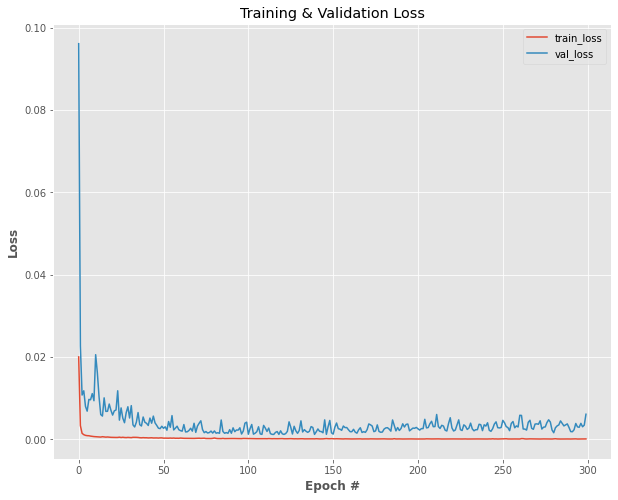

In [43]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [44]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [45]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

266.076143636594

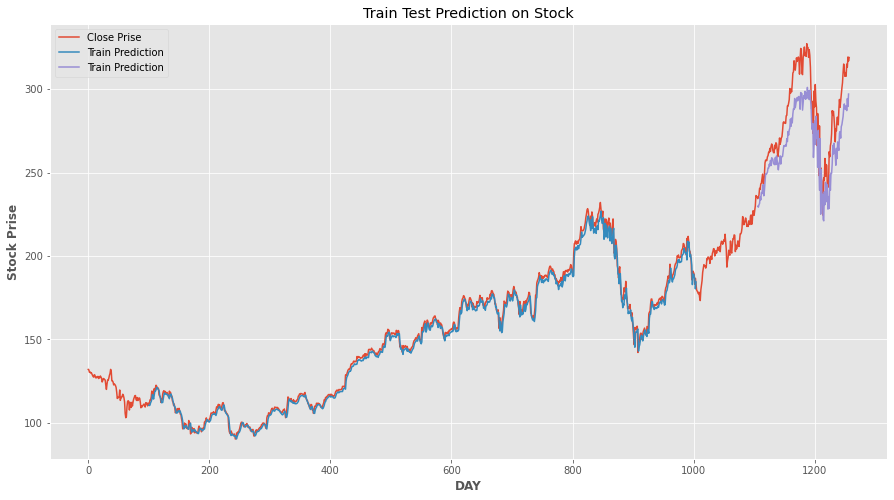

In [47]:
# shift train predictions for plotting
import numpy 
plt.style.use("ggplot")
plt.figure(figsize = [15,8])

# plot actual stock prise
plt.plot(df["close"], label="Close Prise")

# plot predicted train prise 
look_back=100
trainPredictPlot = numpy.empty_like(Close_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
plt.plot(trainPredictPlot, label="Train Prediction")

# plot predicted test prise
testPredictPlot = numpy.empty_like(Close_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Close_scaled)-1, :] = test_predict
plt.plot(testPredictPlot, label="Train Prediction")

plt.title("Train Test Prediction on Stock")
plt.xlabel("DAY", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

### 9. Predicting For the next 30 data

In [48]:
len(test_data)

252

In [49]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
print("temp input sample: ", temp_input[:10])

temp input sample:  [0.8583551465000423, 0.8866418981676942, 0.8743139407244789, 0.8843198513890065, 0.8783669678290975, 0.8986321033521913, 0.925821160179009, 0.9287764924427933, 0.9567677108840666, 0.9386979650426415]


In [52]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("--"*25)
        print("{} - day input : {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} - day output:  {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print()    
print("FINAL 30 DAY OUTPUT")
print(lst_output)

[0.8705633]
101
--------------------------------------------------
1 - day input : [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85

### 10. Visualizaing The Output

In [53]:
len(Close_scaled)

1258

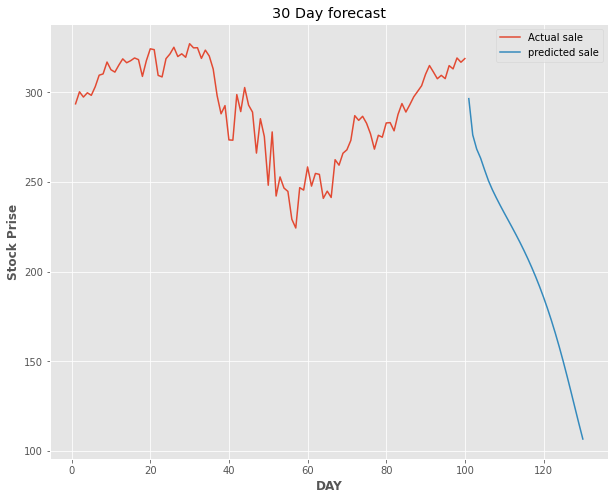

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)



plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(day_new,scaler.inverse_transform(Close_scaled[1158:]) , label="Actual sale")
plt.plot(day_pred,scaler.inverse_transform(lst_output), label="predicted sale")
plt.title("30 Day forecast")
plt.xlabel("DAY", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

# THE END